### Import Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = os.path.join(os.getcwd(), "datasets", "adult.csv")


In [6]:
df = pd.read_csv(data)

df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [7]:
print(df.shape)

(48842, 15)


In [8]:
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [9]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### Replacing ? with Nan

In [10]:
df['workclass'] = df['workclass'].replace('?', np.nan)
df['occupation'] = df['occupation'].replace('?', np.nan)
df['native-country'] = df['native-country'].replace('?', np.nan)


In [11]:
df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [12]:
# Check For Missing Values

info = pd.DataFrame(df.isnull().sum(), columns=["IsNull"])
info.insert(1, "IsNa", df.isna().sum(), True)
info.insert(2, "Duplicate", df.duplicated().sum(), True)
info.insert(3, "Unique",df.nunique(), True)
info.T

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
IsNull,0,2799,0,0,0,0,2809,0,0,0,0,0,0,857,0
IsNa,0,2799,0,0,0,0,2809,0,0,0,0,0,0,857,0
Duplicate,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
Unique,74,8,28523,16,16,7,14,6,5,2,123,99,96,41,2


In [13]:
df1 = df.copy()

### Remove nan value

In [14]:
df.dropna(how='any', inplace=True)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [15]:
df.shape

(45222, 15)

### Remove Duplicated

In [16]:
df = df.drop_duplicates()
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


##### remove educational-num, capital-gain, capital-loss

##### Check 'education' & 'educational-num' columns

In [17]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [18]:
df['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14,  3, 11,  5, 16,  8,  2,  1],
      dtype=int64)

#### Drop capital-gain, and capital-loss columns¶

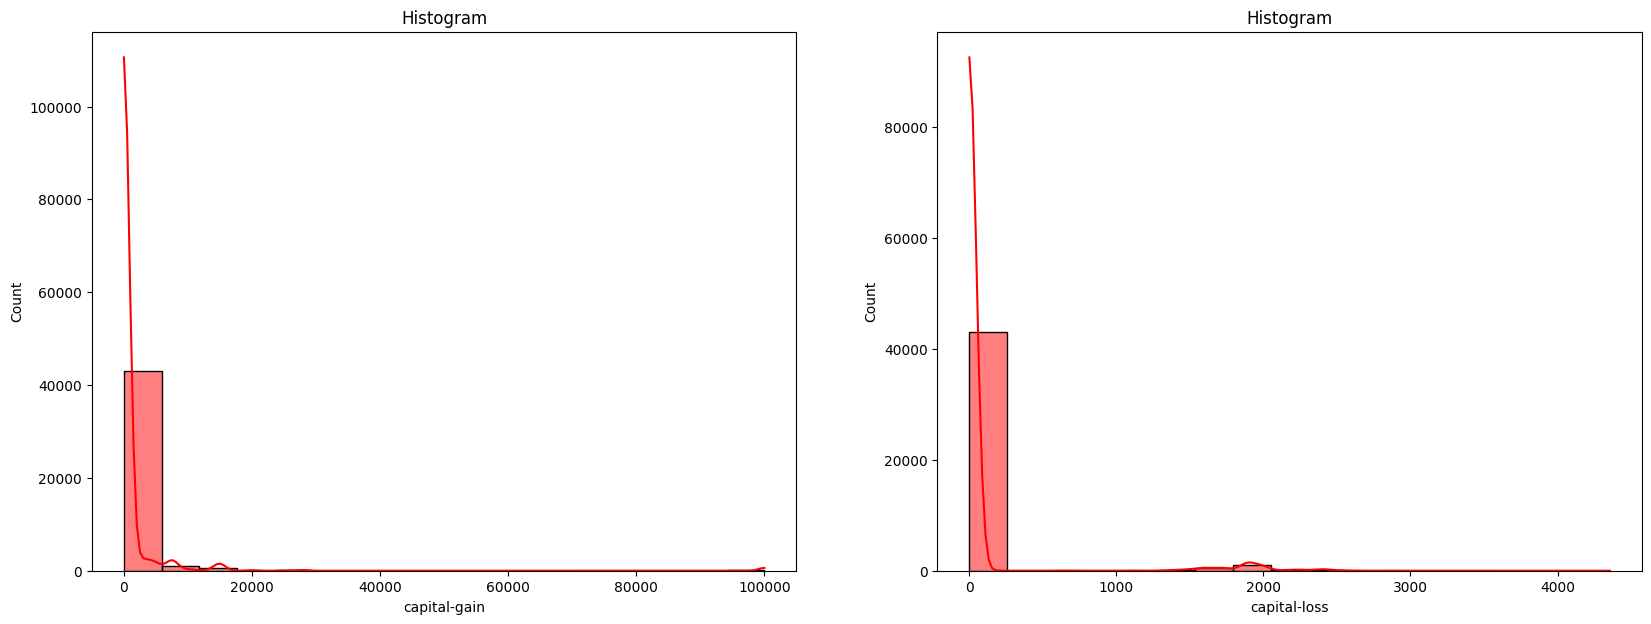

In [19]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
sns.histplot(df['capital-gain'], kde = True, color='r')
plt.title('Histogram')
plt.subplot(1, 2, 2)
sns.histplot(df['capital-loss'], kde = True, color='r')
plt.title('Histogram')

plt.show()


In [20]:
df1 = df.drop(['educational-num', 'capital-gain', 'capital-loss'], axis=1)

##### Convert categorical cate to numerical using LableEncoder

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45175 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45175 non-null  int64 
 1   workclass       45175 non-null  object
 2   fnlwgt          45175 non-null  int64 
 3   education       45175 non-null  object
 4   marital-status  45175 non-null  object
 5   occupation      45175 non-null  object
 6   relationship    45175 non-null  object
 7   race            45175 non-null  object
 8   gender          45175 non-null  object
 9   hours-per-week  45175 non-null  int64 
 10  native-country  45175 non-null  object
 11  income          45175 non-null  object
dtypes: int64(3), object(9)
memory usage: 4.5+ MB


In [22]:
from sklearn import preprocessing

In [23]:
df1.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K


In [24]:
label_encoder = preprocessing.LabelEncoder()

df1['gender'] = label_encoder.fit_transform(df1['gender'])
df1['workclass'] = label_encoder.fit_transform(df1['workclass'])
df1['education'] = label_encoder.fit_transform(df1['education'])
df1['marital-status'] = label_encoder.fit_transform(df1['marital-status'])
df1['occupation'] = label_encoder.fit_transform(df1['occupation'])
df1['relationship'] = label_encoder.fit_transform(df1['relationship'])
df1['race'] = label_encoder.fit_transform(df1['race'])
df1['native-country'] = label_encoder.fit_transform(df1['native-country'])
df1['income'] = label_encoder.fit_transform(df1['income'])


In [25]:
df1.head(10)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,2,226802,1,4,6,3,2,1,40,38,0
1,38,2,89814,11,2,4,0,4,1,50,38,0
2,28,1,336951,7,2,10,0,4,1,40,38,1
3,44,2,160323,15,2,6,0,2,1,40,38,1
5,34,2,198693,0,4,7,1,4,1,30,38,0
7,63,4,104626,14,2,9,0,4,1,32,38,1
8,24,2,369667,15,4,7,4,4,0,40,38,0
9,55,2,104996,5,2,2,0,4,1,10,38,0
10,65,2,184454,11,2,6,0,4,1,40,38,1
11,36,0,212465,9,2,0,0,4,1,40,38,0


In [26]:
df1.shape

(45175, 12)

In [27]:
# Check For Missing Values

info = pd.DataFrame(df1.isnull().sum(), columns=["IsNull"])
info.insert(1, "IsNa", df1.isna().sum(), True)
info.T

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
IsNull,0,0,0,0,0,0,0,0,0,0,0,0
IsNa,0,0,0,0,0,0,0,0,0,0,0,0


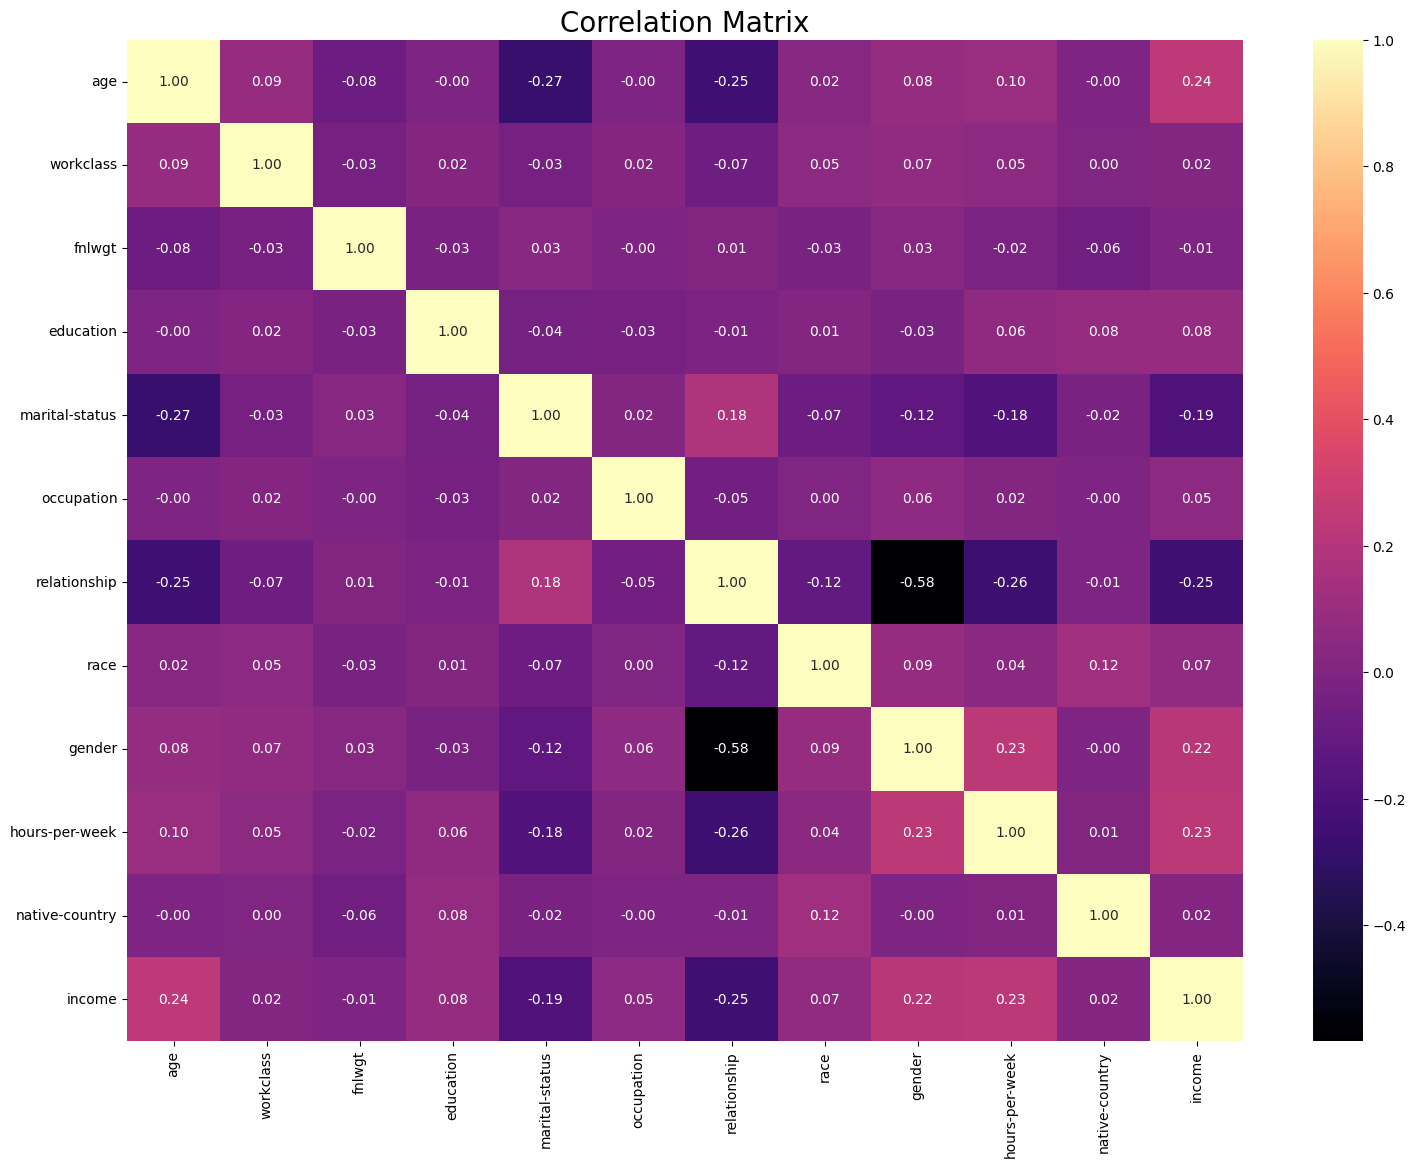

In [29]:
# Correlation matrix
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df1.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [30]:
def diagnostic_plots(df, variable,target):
    # The function takes a dataframe (df) and
    # the variable of interest as arguments.

    # Define figure size.
    plt.figure(figsize=(20, 7))

    # histogram
    plt.subplot(1, 4, 1)
    sns.histplot(df[variable], kde = True,color='r')
    plt.title('Histogram')


    # scatterplot
    plt.subplot(1, 4, 2)
    plt.scatter(df[variable],df[target],color = 'g')
    plt.title('Scatterplot')


    # boxplot
    plt.subplot(1, 4, 3)
    sns.boxplot(y=df[variable],color = 'b')
    plt.title('Boxplot')

    # barplot
    plt.subplot(1, 4, 4)
    sns.barplot(x = target, y = variable, data = df)
    plt.title('Barplot')


    plt.show()

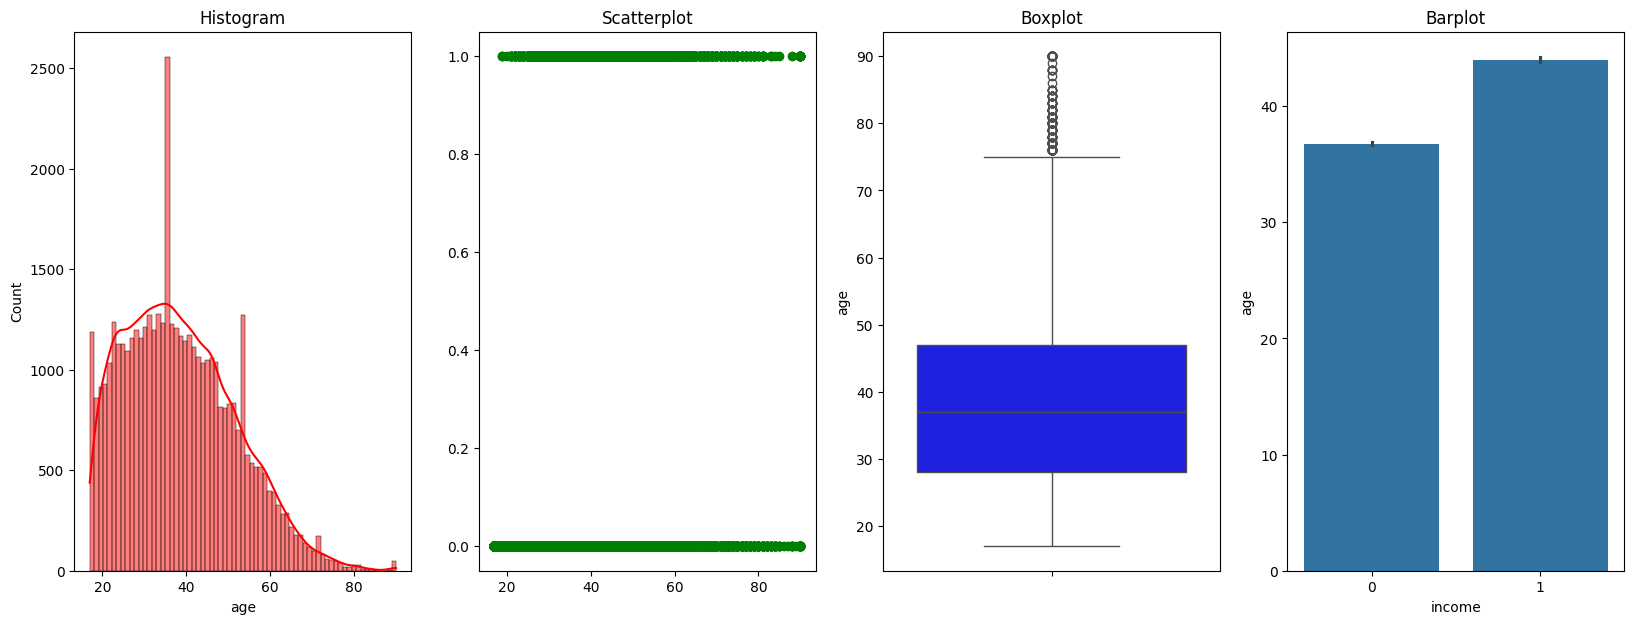

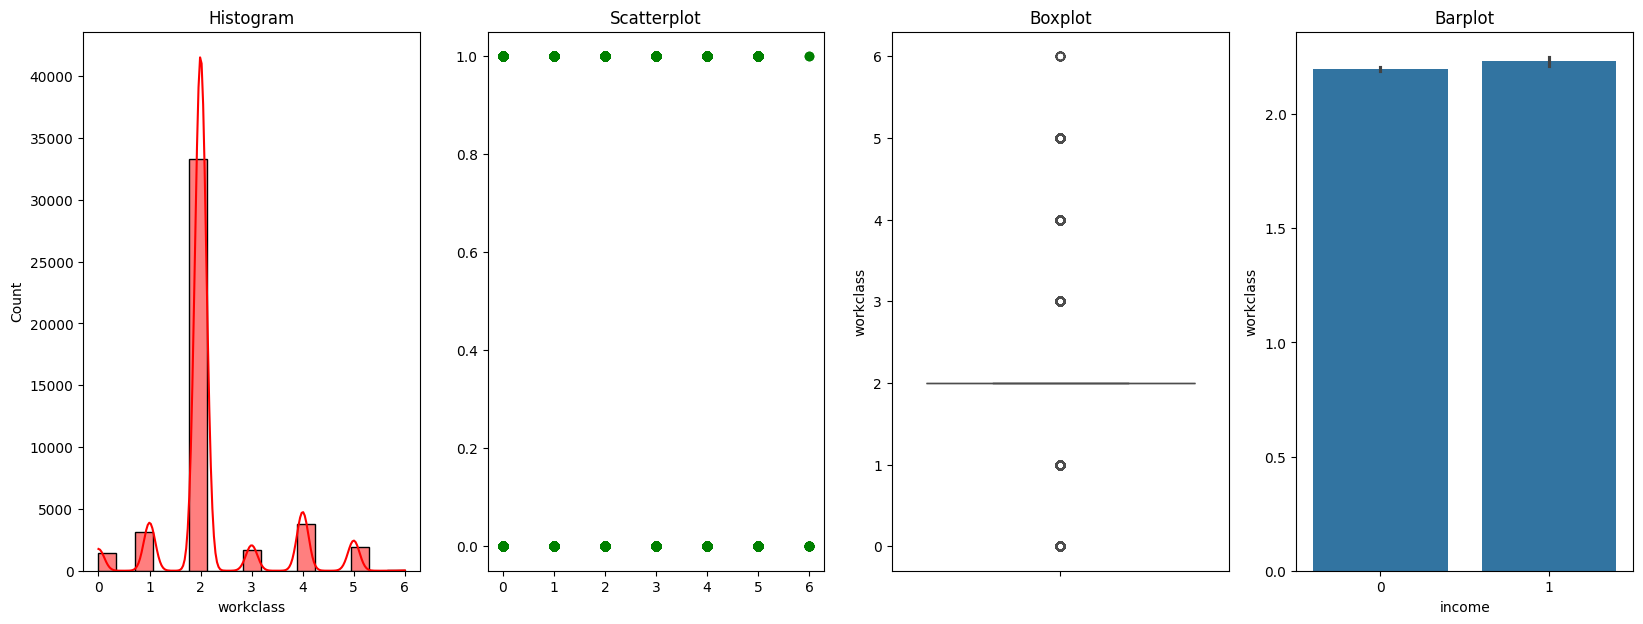

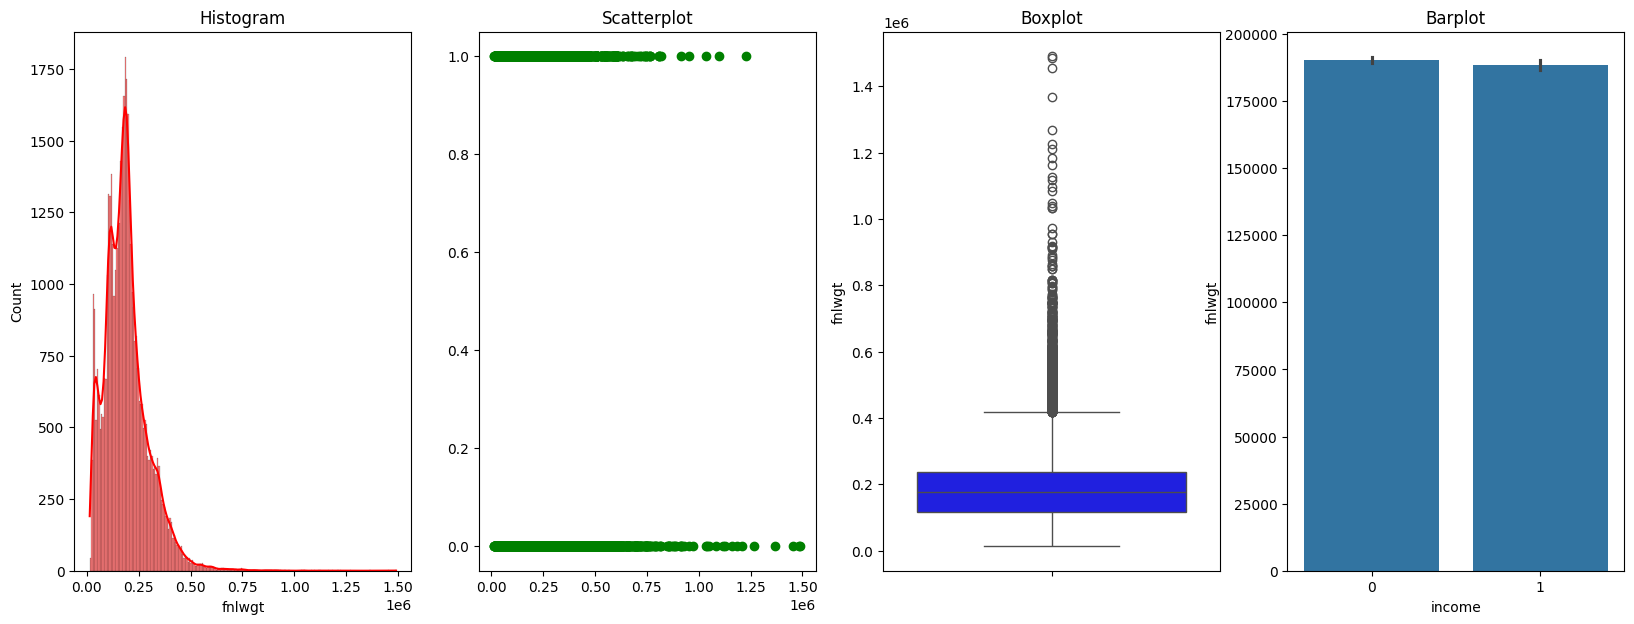

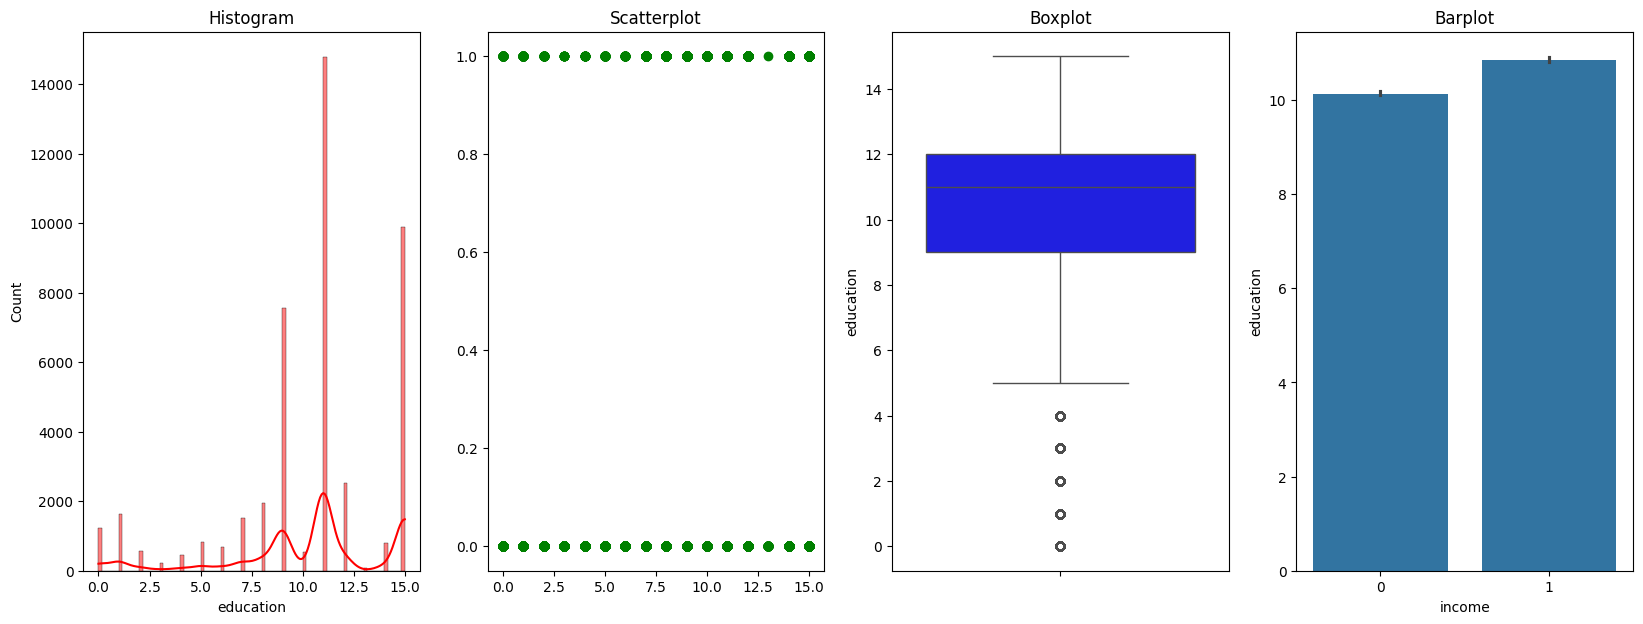

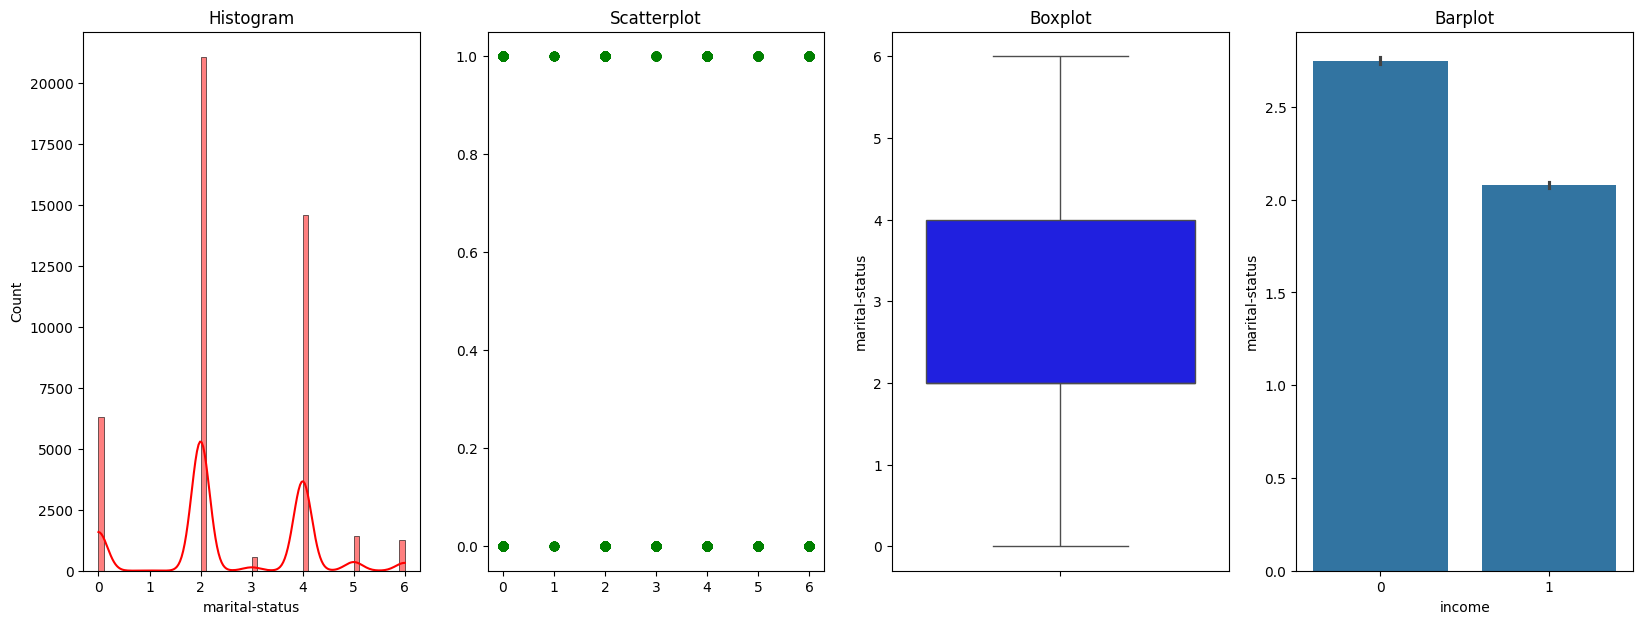

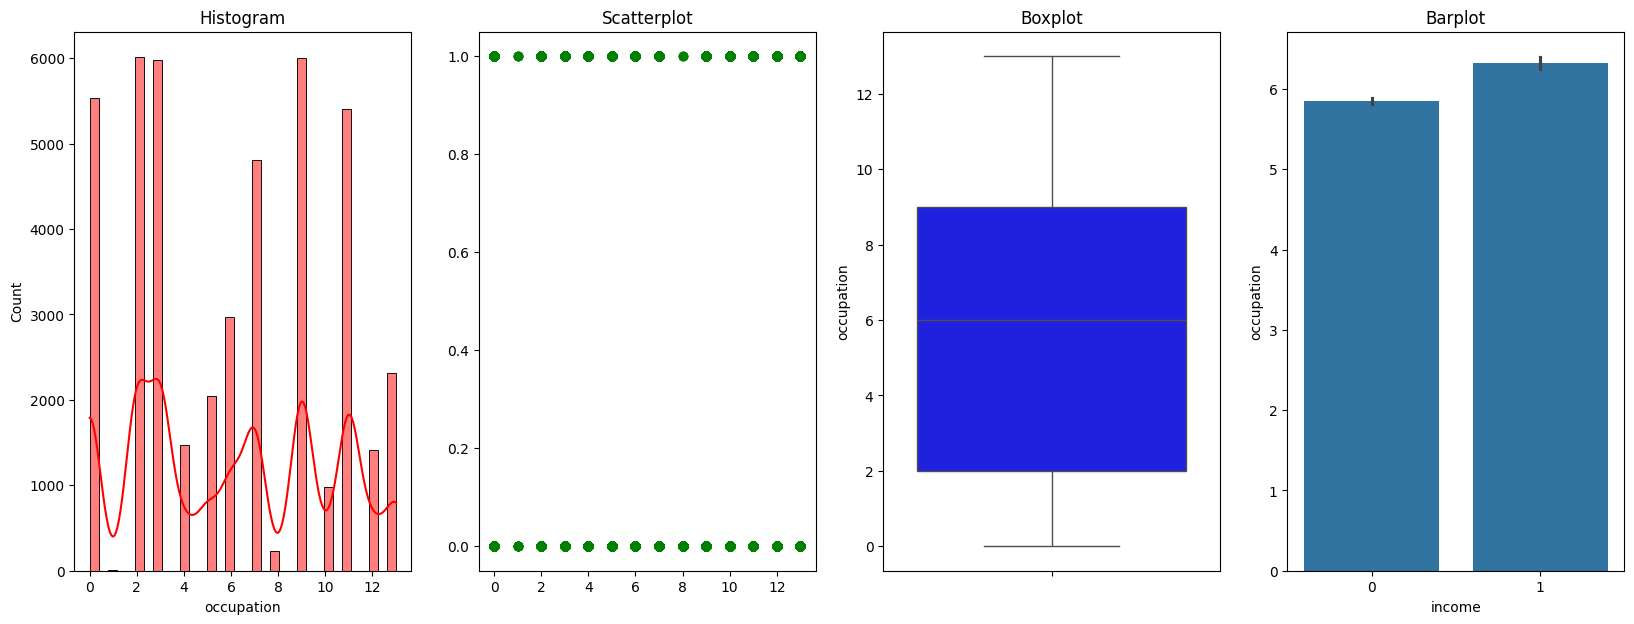

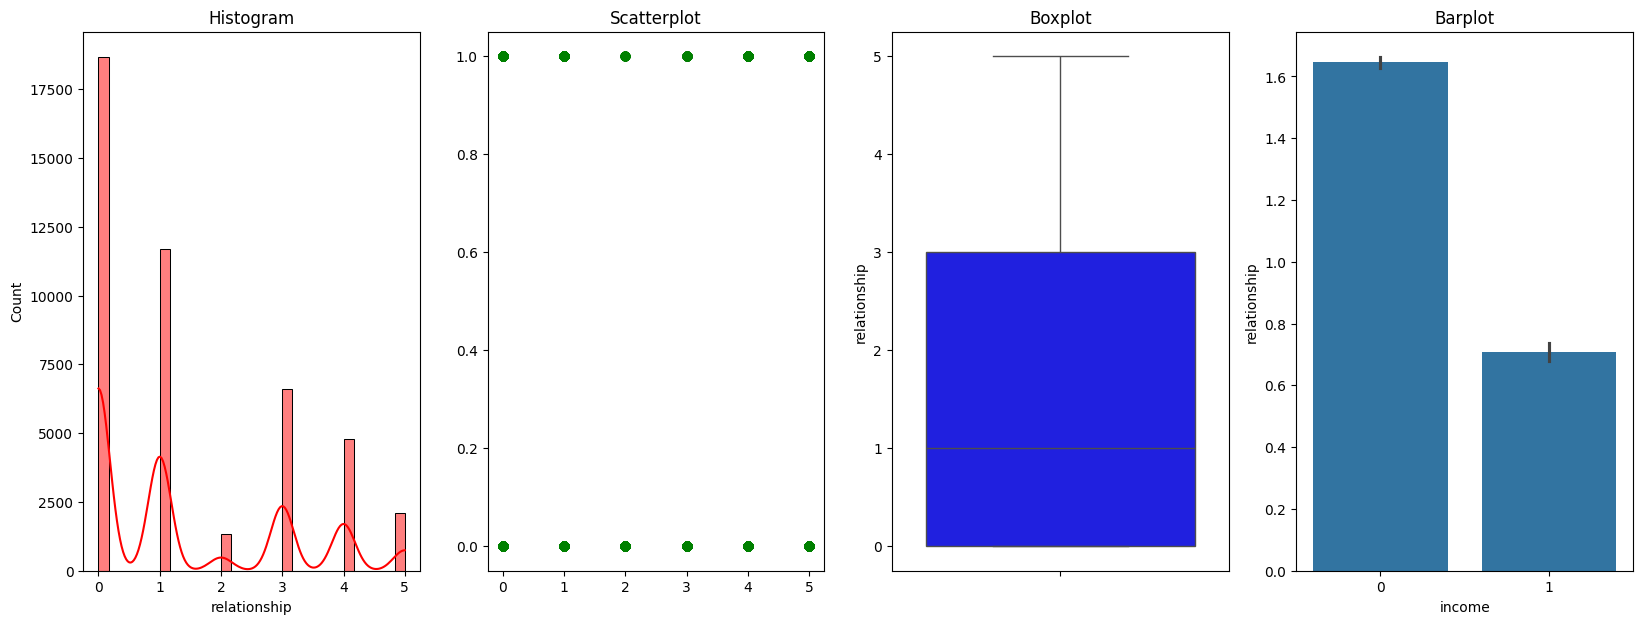

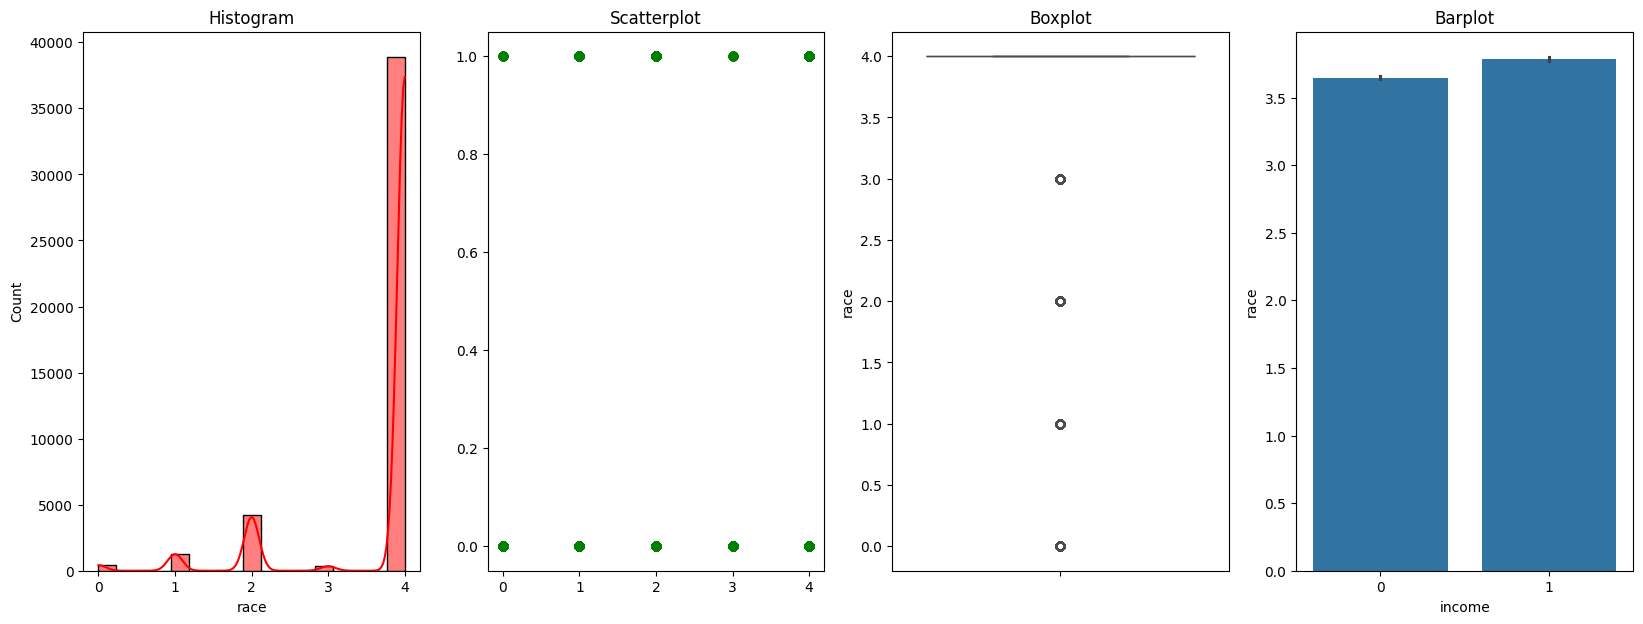

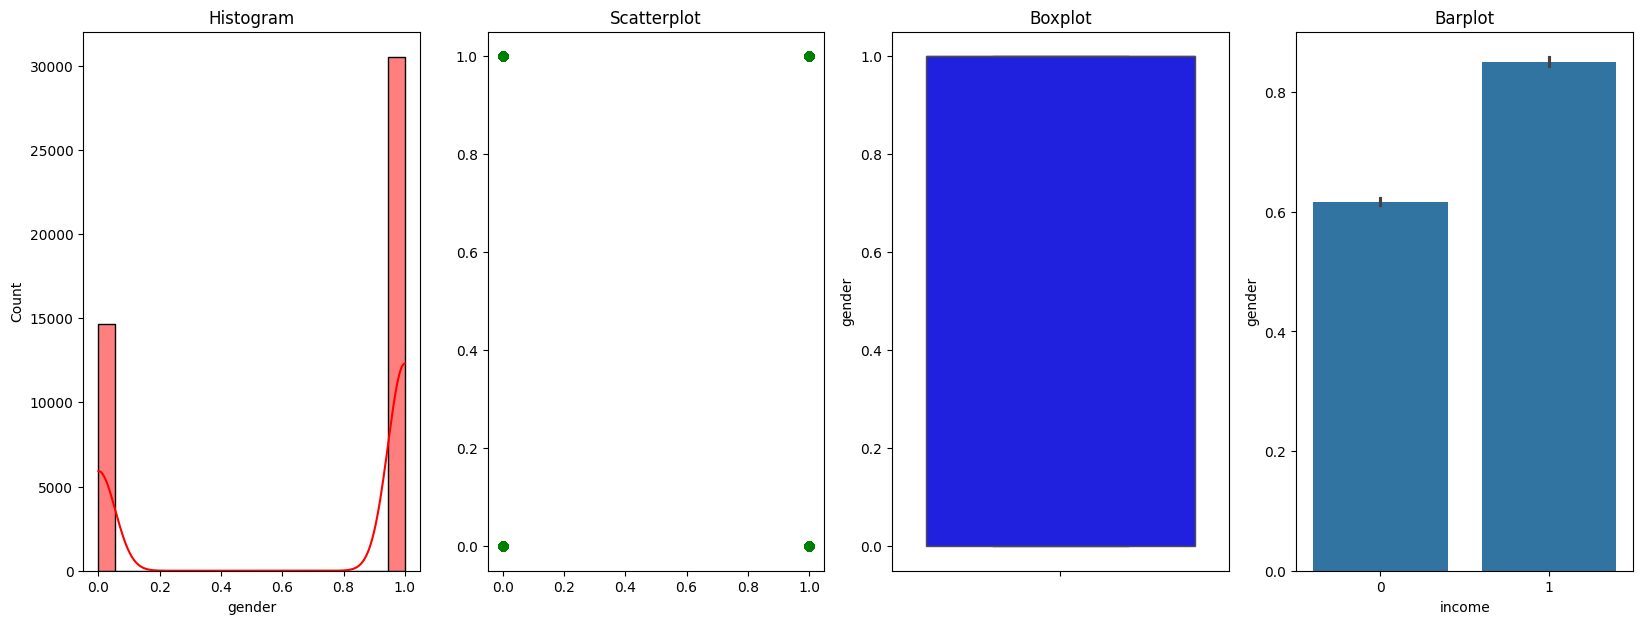

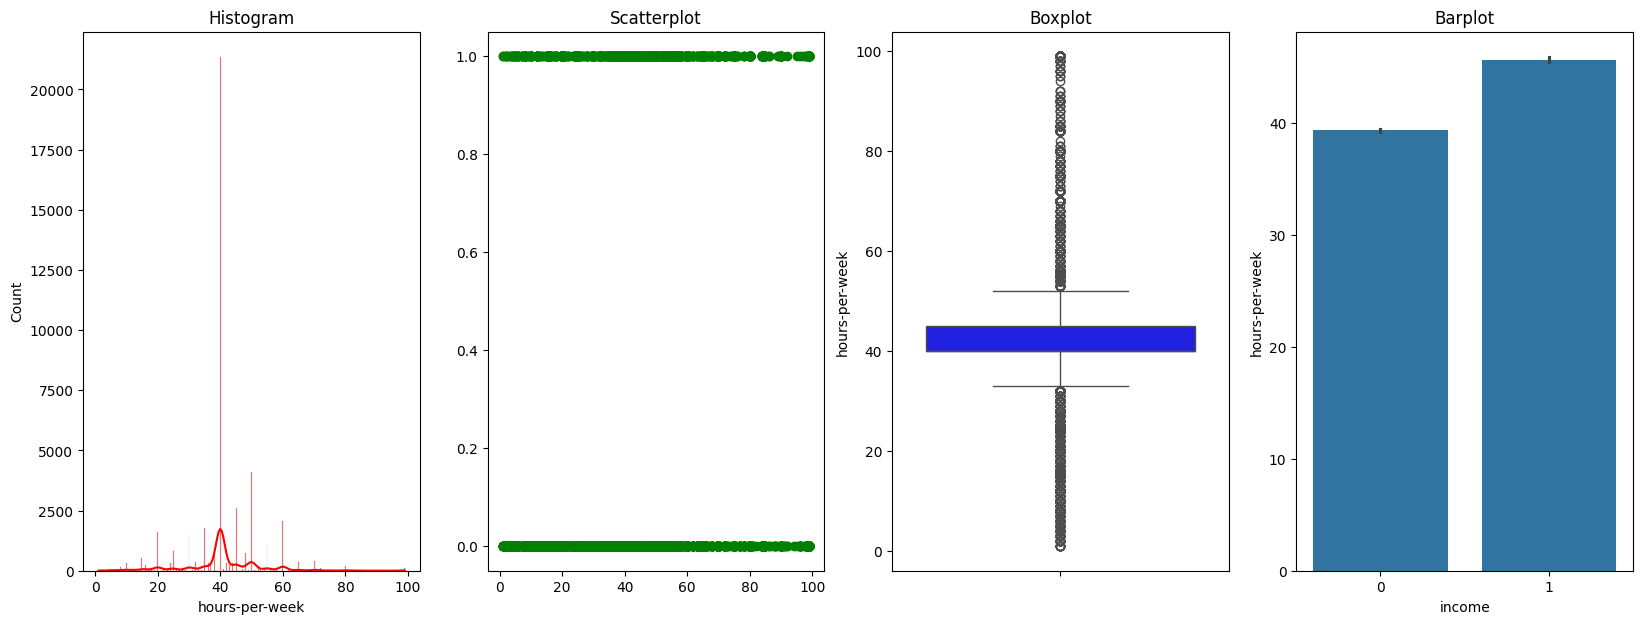

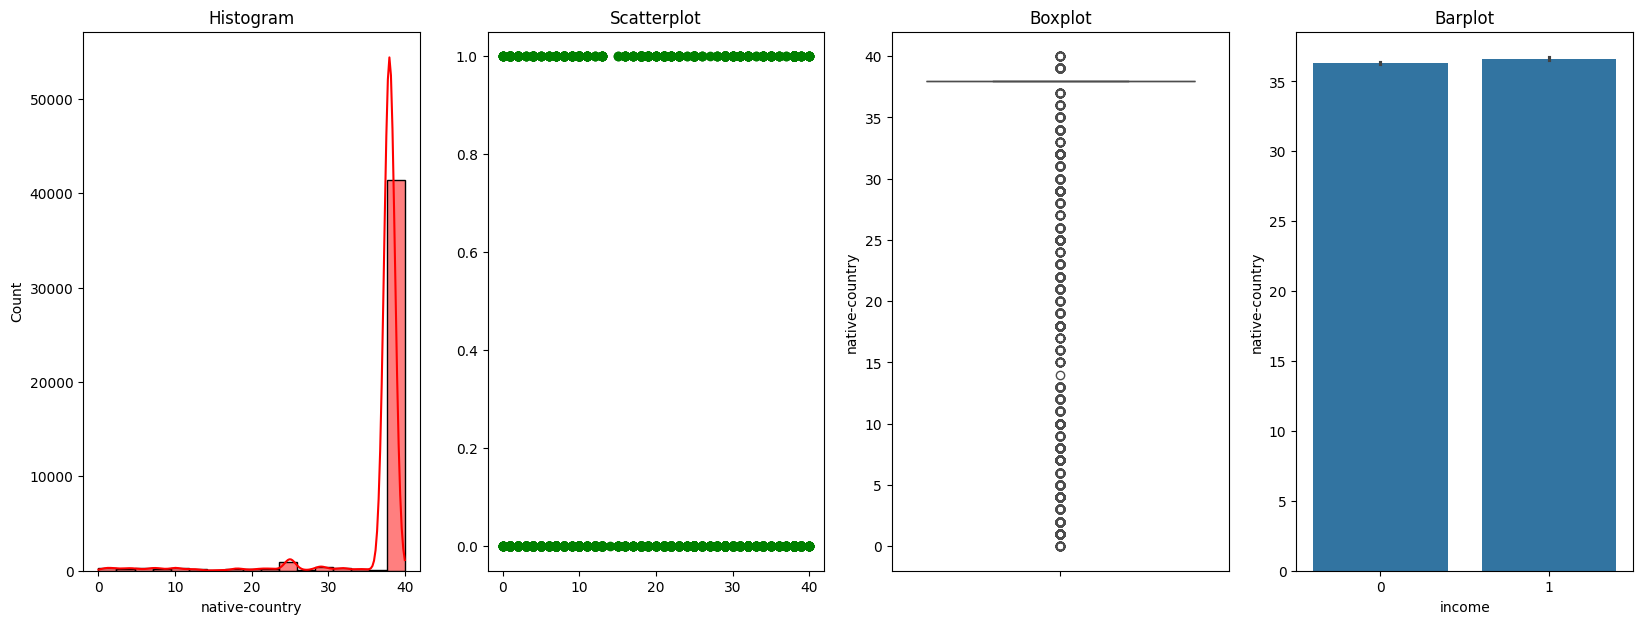

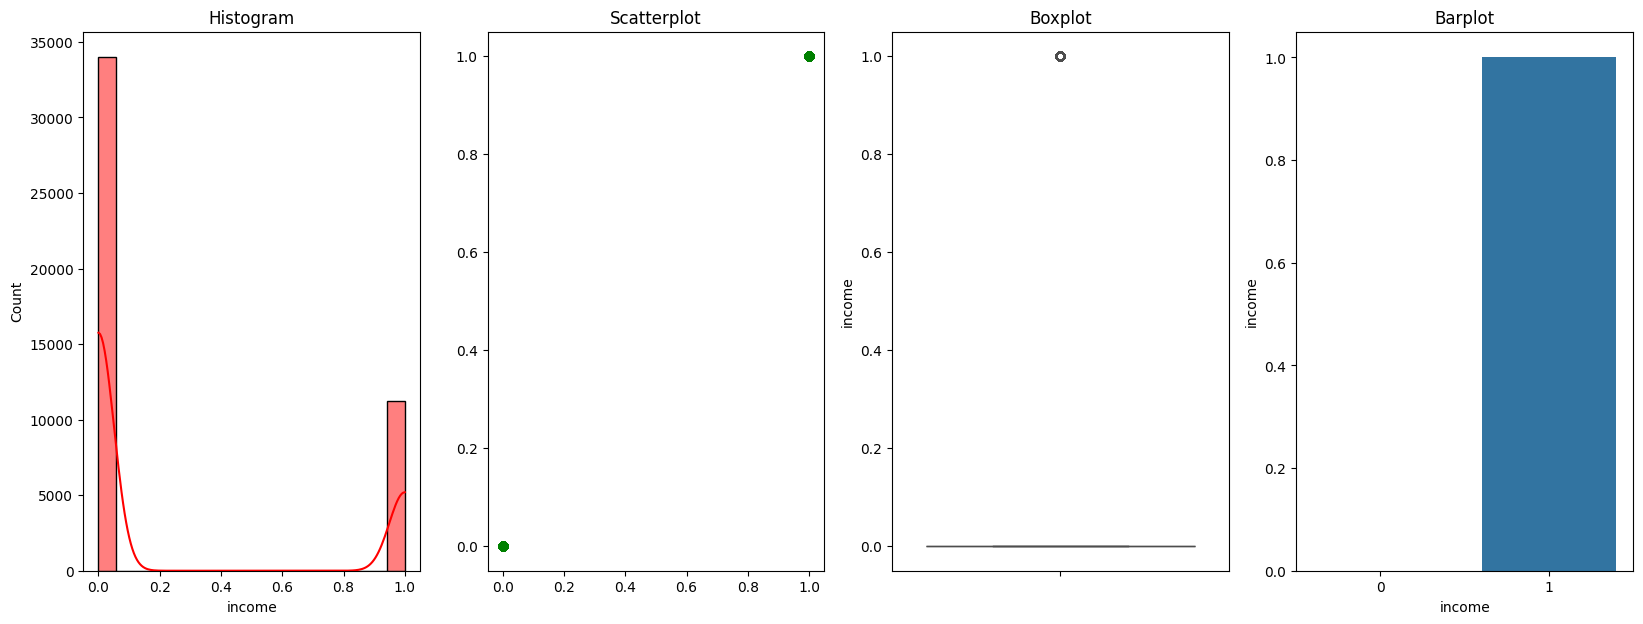

In [31]:
for col in df1:
    diagnostic_plots(df1,col,'income')

### Model

In [32]:
from sklearn.model_selection import train_test_split

#KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [33]:
# split Data
X = df1.drop(columns={"income"}, axis=1)
y = df1["income"].values.reshape(-1, 1)

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.1, random_state=1)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (40657, 11)
y_train shape: (40657, 1)
X_test shape: (4518, 11)
y_test shape: (4518, 1)


### Scaling Data

In [35]:
from sklearn.preprocessing import MinMaxScaler

st = MinMaxScaler()
X_train = st.fit_transform(X_train)
X_test = st.fit_transform(X_test)

In [36]:
#Find Best K

K = 40
error = []
accuracy = []

for i in range(1, K+1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error.append(1-metrics.accuracy_score(y_test, y_pred))
    accuracy.append(metrics.accuracy_score(y_test, y_pred))

In [37]:
print(error)
print(accuracy)

[0.23417441345728196, 0.20517928286852594, 0.2065073041168659, 0.19344842850818944, 0.19455511288180616, 0.19145639663567948, 0.18946436476316952, 0.18636564851704296, 0.18171757414785306, 0.17773351040283314, 0.18304559539619303, 0.1772908366533864, 0.1797255422753431, 0.17994687915006635, 0.17950420540061973, 0.17574147853032318, 0.17751217352810977, 0.17552014165559982, 0.17463479415670646, 0.17220008853474988, 0.17552014165559982, 0.1726427622841965, 0.17773351040283314, 0.17485613103142983, 0.17352810978308986, 0.17286409915891987, 0.17242142540947325, 0.1708720672864099, 0.17419212040725984, 0.17286409915891987, 0.1733067729083665, 0.1715360779105799, 0.17109340416113328, 0.16998671978751656, 0.17109340416113328, 0.17065073041168655, 0.1726427622841965, 0.1726427622841965, 0.17419212040725984, 0.17109340416113328]
[0.765825586542718, 0.7948207171314741, 0.7934926958831341, 0.8065515714918106, 0.8054448871181938, 0.8085436033643205, 0.8105356352368305, 0.813634351482957, 0.8182824

Text(0.5, 1.0, 'accuracy vs K')

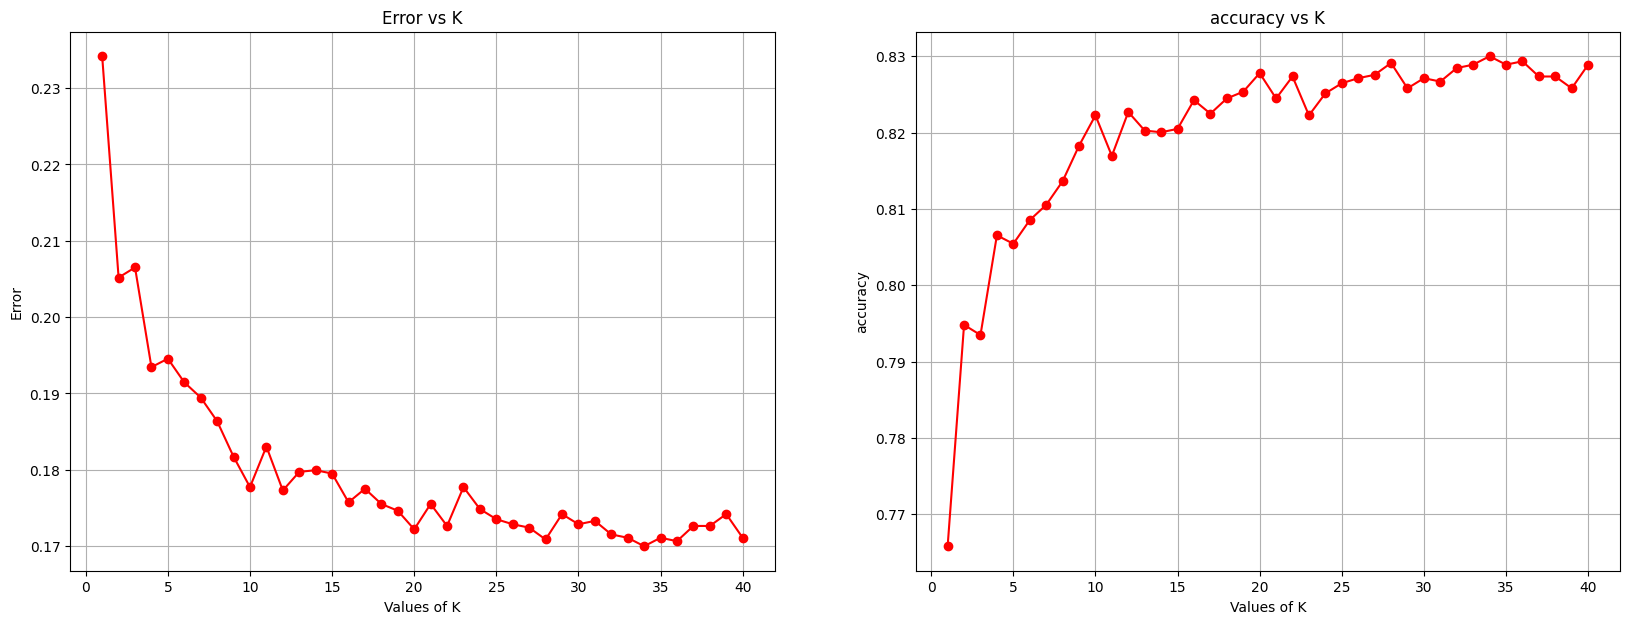

In [ ]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.plot(range(1,41),error,'r-',marker='o')
plt.xlabel('Values of K')
plt.ylabel('Error')
plt.grid()
plt.title('Error vs K')

plt.subplot(1, 2, 2)
plt.plot(range(1,41),accuracy,'r-',marker='o')
plt.xlabel('Values of K')
plt.ylabel('accuracy')
plt.grid()
plt.title('accuracy vs K')

              precision    recall  f1-score   support

           0     0.8653    0.9158    0.8898      3408
           1     0.6850    0.5622    0.6175      1110

    accuracy                         0.8289      4518
   macro avg     0.7751    0.7390    0.7537      4518
weighted avg     0.8210    0.8289    0.8229      4518



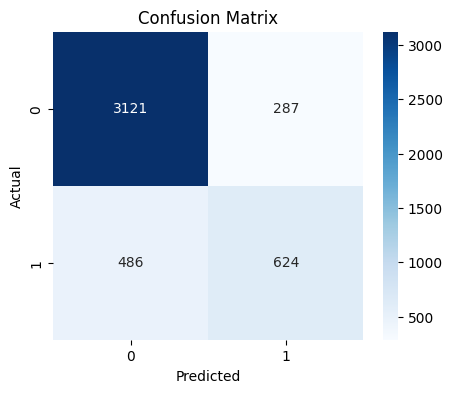

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Classification report
print(classification_report(y_test, y_pred, digits=4))

# Confusion matrix with heat map
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
